<a href="https://colab.research.google.com/github/mz-zarei/CGAN-EB/blob/main/CGAN_EB_RealData_UFD4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Import Libraies & Final Data**



In [ ]:
%cd /content/drive/My Drive/GAN_regression/ganRegression/
%matplotlib inline

!pip install -r requirements.txt
!pip install -e 
!pip install xlsxwriter

import xlsxwriter
import importlib
import dataset, metrics, plotting, config, network
from models import cgan_model
import numpy as np
import random
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import kendalltau, pearsonr, spearmanr
import xlsxwriter

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200



In [ ]:
#### Preparing crash data
Path_to_data = "/content/drive/MyDrive/GAN_regression/ganRegression/UrbanFreeWay4laneDivided.xlsx"

## Importing Data
crash_data_all = pd.read_excel(Path_to_data)
crash_data_all.sort_values(by=['ID'])

crash_data_all[crash_data_all["year"] < 2018]['TERRAIN'].describe()

count     18510
unique        2
top           R
freq      12282
Name: TERRAIN, dtype: object

In [ ]:
## Seperating data set based on years and types based "Class2" considering Divided Undivided

valid_years = 3  # number of future years to be used for validation
model_years = 3  # nomber of years used for developing models
start_year = 2012


crash_data = crash_data_all[(crash_data_all["year"] < 2015)]
crash_data.sort_values('ID', inplace=True)
crash_data = crash_data.reset_index(drop=True)


crash_data['log_AADT'] = np.log(crash_data["AADT"])
crash_data['log_L'] = np.log(crash_data['SEG_LNG'])

Terrain_one_hot = pd.get_dummies(crash_data.TERRAIN, prefix='TERRAIN')

crash_data[Terrain_one_hot.columns.to_list()] = Terrain_one_hot



features_all = ['LSHLDWID','LSHL_WD2','MEDWID','RSHLDWID','RSHL_WD2','log_AADT', 'log_L','TERRAIN_L']

x_data_all = crash_data[features_all].astype(np.float)  
y_data_all = crash_data['TotalCrash'].astype(np.float)


# Sclaing feature vector
scaler_p1 = StandardScaler().fit(x_data_all)

x_data_scaled = scaler_p1.transform(x_data_all)

x_data_all

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,LSHLDWID,LSHL_WD2,MEDWID,RSHLDWID,RSHL_WD2,log_AADT,log_L,TERRAIN_L
0,0.0,4.0,750.0,0.0,8.0,10.052468,-3.912023,1.0
1,0.0,4.0,750.0,0.0,8.0,10.052468,-3.912023,1.0
2,0.0,4.0,750.0,0.0,8.0,10.015923,-3.912023,1.0
3,4.0,8.0,350.0,0.0,8.0,10.015923,-4.605170,1.0
4,4.0,8.0,350.0,0.0,8.0,10.052468,-4.605170,1.0
...,...,...,...,...,...,...,...,...
9250,0.0,0.0,18.0,0.0,0.0,10.688804,-4.605170,0.0
9251,0.0,0.0,18.0,0.0,0.0,10.712037,-4.605170,0.0
9252,0.0,0.0,18.0,0.0,0.0,10.523688,-2.659260,0.0
9253,0.0,0.0,18.0,0.0,0.0,10.546945,-2.659260,0.0


In [ ]:


crash_data_p2 = crash_data_all[crash_data_all["year"] > 2014]
crash_data_p2.sort_values('ID', inplace=True)
crash_data_p2 = crash_data_p2.reset_index(drop=True)


crash_data_p2['log_AADT'] = np.log(crash_data_p2["AADT"])
crash_data_p2['log_L'] = np.log(crash_data_p2['SEG_LNG'])

Terrain_one_hot = pd.get_dummies(crash_data_p2.TERRAIN, prefix='TERRAIN')

crash_data_p2[Terrain_one_hot.columns.to_list()] = Terrain_one_hot



features_all = ['LSHLDWID','LSHL_WD2','MEDWID','RSHLDWID','RSHL_WD2','log_AADT', 'log_L','TERRAIN_L']

x_data_all_p2 = crash_data_p2[features_all].astype(np.float)  
y_data_all_p2 = crash_data_p2['TotalCrash'].astype(np.float)


# Sclaing feature vector
scaler = StandardScaler()

x_data_scaled_p2 = scaler.fit_transform(x_data_all_p2)
x_data_all_p2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,LSHLDWID,LSHL_WD2,MEDWID,RSHLDWID,RSHL_WD2,log_AADT,log_L,TERRAIN_L
0,0.0,4.0,750.0,0.0,8.0,10.038368,-3.912023,1.0
1,0.0,4.0,750.0,0.0,8.0,10.061004,-3.912023,1.0
2,0.0,4.0,750.0,0.0,8.0,10.071752,-3.912023,1.0
3,4.0,8.0,350.0,0.0,8.0,10.071752,-4.605170,1.0
4,4.0,8.0,350.0,0.0,8.0,10.038368,-4.605170,1.0
...,...,...,...,...,...,...,...,...
9250,0.0,0.0,18.0,0.0,0.0,10.744494,-4.605170,0.0
9251,0.0,0.0,18.0,0.0,0.0,10.759519,-4.605170,0.0
9252,0.0,0.0,18.0,0.0,0.0,10.579412,-2.659260,0.0
9253,0.0,0.0,18.0,0.0,0.0,10.594432,-2.659260,0.0


# **2 NB models**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

def fit_NB(crash_data, x_data, y_data):
    ########    Calculating Alpha
    result = crash_data.copy()
    result.reset_index(inplace=True)
    X = sm.add_constant(x_data)
    y =  y_data

    poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

    result['lambda'] = poisson_model.mu

    result['AUX_OLS_DEP'] = result.apply(lambda x: ((x['TotalCrash'] - x['lambda'])**2 - x['lambda']) / x['lambda'], axis=1)


    aux_olsr_results = sm.OLS(result['AUX_OLS_DEP'], result['lambda']).fit()
    alpha = aux_olsr_results.params
    alpha_se = aux_olsr_results.bse
    print("Disperssion: ", round(alpha[0],3), " | SE: ", round(aux_olsr_results.bse[0],3))
    result['alpha'] = alpha[0]

    NB_model = sm.GLM(y, X,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
    y_pred_NB = pd.DataFrame(NB_model.predict(X))
    return NB_model, alpha[0], y_pred_NB

def MAPE(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return np.mean(np.abs(res))

def adj_r2(y_true,y_actual,n,p):
    adj_r2 = 1-(1-r2_score(y_true, y_actual))*(n-1)/(n-p-1)
    return adj_r2

### Stepwise feature selection functions
def forward_regression(data, X, y, threshold_in, verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model, _, _ = fit_NB(data, pd.DataFrame(X[included+[new_column]]), y)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

def backward_regression(data, X, y, threshold_out, verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model, _, _ = fit_NB(data, pd.DataFrame(X[included]), y)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Fitting NB Models for P1


significant_features = forward_regression(crash_data, x_data_all, y_data_all, 0.05, verbose=False)


NB_model_P1, alpha, y_pred_NB  = fit_NB(crash_data, x_data_all[significant_features], y_data_all)
print("MAPE(%): ", round(MAPE(y_data_all.values, y_pred_NB.values.transpose()[0]),4),
        "| R2 score: ", round(r2_score(y_data_all, y_pred_NB),3))


print(NB_model_P1.summary2())
# VIF calculation
vifs = pd.Series(np.linalg.inv(x_data_all[significant_features].corr().to_numpy()).diagonal(), 
            index=x_data_all[significant_features].columns, 
            name='VIF')
print("=====VIFs=====")
print(vifs)

df = pd.DataFrame()
df['ID'] = crash_data['ID']
df['Alpha'] = alpha
df['AADT'] = crash_data['AADT']
df['NB_pred'] = y_pred_NB
df['TotalCrash'] = y_data_all
df['SEG_LNG'] = crash_data['SEG_LNG']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Disperssion:  6.371  | SE:  0.798
Disperssion:  6.346  | SE:  0.785
Disperssion:  2.583  | SE:  0.229
Disperssion:  6.221  | SE:  0.749
Disperssion:  6.357  | SE:  0.784
Disperssion:  6.342  | SE:  0.782
Disperssion:  2.998  | SE:  0.419
Disperssion:  6.306  | SE:  0.733
Disperssion:  2.543  | SE:  0.216
Disperssion:  2.39  | SE:  0.219
Disperssion:  2.516  | SE:  0.21
Disperssion:  2.57  | SE:  0.225
Disperssion:  2.495  | SE:  0.211
Disperssion:  0.969  | SE:  0.086
Disperssion:  2.312  | SE:  0.174
Disperssion:  0.964  | SE:  0.085
Disperssion:  0.901  | SE:  0.061
Disperssion:  0.969  | SE:  0.086
Disperssion:  0.962  | SE:  0.083
Disperssion:  0.973  | SE:  0.087
Disperssion:  0.834  | SE:  0.052
Disperssion:  0.833  | SE:  0.052
Disperssion:  0.83  | SE:  0.052
Disperssion:  0.834  | SE:  0.052
Disperssion:  0.833  | SE:  0.052
Disperssion:  0.84  | SE:  0.052
Disperssion:  0.837  | SE:  0.052
Disperssion:  0.84  | SE:  0.052
Disperssion:  0.839  | SE:  0.052
Disperssion:  0.838 

In [ ]:
## Fitting NB Models for P1

# significant_features = forward_regression(crash_data_p2, x_data_all_p2, y_data_all_p2, 0.05, verbose=False)


# NB_model_P2, alpha, y_pred_NB  = fit_NB(crash_data_p2, x_data_all_p2[significant_features], y_data_all_p2)
# print("MAPE(%): ", round(MAPE(y_data_all_p2.values, y_pred_NB.values.transpose()[0]),4),
#         "| R2 score: ", round(r2_score(y_data_all_p2, y_pred_NB),3))


# print(NB_model_P2.summary2())


# # VIF calculation
# vifs = pd.Series(np.linalg.inv(x_data_all_p2[significant_features].corr().to_numpy()).diagonal(), 
#             index=x_data_all_p2[significant_features].columns, name='VIF')


# print("=====VIFs=====")
# print(vifs)

df_p2 = pd.DataFrame()
df_p2['ID'] = crash_data_p2['ID']
df_p2['Alpha'] = alpha
# df_p2['NB_pred'] = y_pred_NB
df_p2['NB_pred'] = NB_model_P1.predict(sm.add_constant(x_data_all_p2[significant_features]))

df_p2['TotalCrash'] = y_data_all_p2
df_p2['SEG_LNG'] = crash_data_p2['SEG_LNG']



# **3 CGAN**


In [ ]:
import os
from tensorflow.compat.v1 import set_random_seed
from models import cgan_model
import dataset, metrics, plotting, config, network
from models import cgan_model
from keras import callbacks 
importlib.reload(network)
importlib.reload(dataset)
importlib.reload(metrics)
importlib.reload(plotting)
importlib.reload(config)
importlib.reload(cgan_model)

# Set random seed
random_seed = 40



site_type = 'midblock_waUF4D'

dataset_config = config.DatasetConfig(scenario=site_type)

assert(dataset_config.scenario == "comp-activ"
      or dataset_config.scenario == "abalone"
      or dataset_config.scenario == "midblock_waUF4D"
      or dataset_config.scenario == "midblock_wa")
fig_dir = f"/content/drive/My Drive/GAN_regression/ganRegression/figures/{dataset_config.scenario}"



exp_config = config.Config(
    model=config.ModelConfig(activation="elu", lr_gen=0.001, lr_disc=0.001, dec_gen=0.001, dec_disc=0, 
                                optim_gen="Adam", optim_disc="Adam", z_input_size=1, random_seed=random_seed),
    training=config.TrainingConfig(n_epochs=1001, batch_size=100, n_samples=100),
    dataset=dataset_config,
    run=config.RunConfig(save_fig=1))

np.random.seed(exp_config.model.random_seed)
random.seed(exp_config.model.random_seed)
set_random_seed(exp_config.model.random_seed)



try:
    os.mkdir(fig_dir)
    print(f"Directory {fig_dir} created ") 
except FileExistsError:
    print(f"Directory {fig_dir} already exists replacing files in this notebook")

print(len(x_data_scaled))

Directory /content/drive/My Drive/GAN_regression/ganRegression/figures/midblock_waUF4D already exists replacing files in this notebook
9255


In [ ]:
cgan = cgan_model.CGAN(exp_config)
d_loss_err, d_loss_true, d_loss_fake, g_loss_err, g_pred, g_true, mape_list, r2_list, fakeavg_list = cgan.train(x_data_scaled, y_data_all.values, x_data_scaled, y_data_all.values,
                                                                              epochs=exp_config.training.n_epochs,
                                                                              batch_size=exp_config.training.batch_size)
plotting.plots(d_loss_err, d_loss_true, d_loss_fake, g_loss_err, g_pred, g_true, fig_dir, exp_config.run.save_fig)


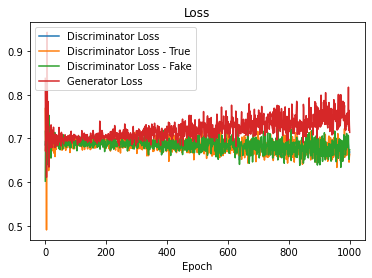

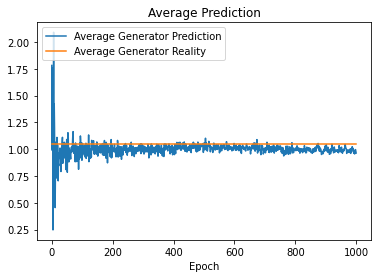

In [ ]:
# cgan = cgan_model.CGAN(exp_config)
# d_loss_err, d_loss_true, d_loss_fake, g_loss_err, g_pred, g_true, mape_list, r2_list, fakeavg_list = cgan.train(x_data_scaled_p2, y_data_all_p2.values, x_data_scaled_p2, y_data_all_p2.values,
#                                                                               epochs=exp_config.training.n_epochs,
#                                                                               batch_size=exp_config.training.batch_size)
# plotting.plots(d_loss_err, d_loss_true, d_loss_fake, g_loss_err, g_pred, g_true, fig_dir, exp_config.run.save_fig)


# **3 CGAN Prediction**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import LeakyReLU
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from tqdm import tqdm
from keras.layers import Activation
from keras import activations
z_input_size = 1

def predict_by_GAN(GAN, xtest):
    noise = np.random.normal(0, 1, (xtest.shape[0], z_input_size))
    ypred = GAN.predict([noise, xtest])
    ypred[ypred<0] = 0
    return np.array(ypred)

def sample(GAN, xtest, n_samples):
    y_samples_gan = predict_by_GAN(GAN, xtest)
    for i in range(n_samples - 1):
        ypred_gan = predict_by_GAN(GAN, xtest)
        y_samples_gan = np.hstack([y_samples_gan, ypred_gan])
    median = []
    mean = []
    mode = []
    Var = []
    for j in range(y_samples_gan.shape[0]):
        median.append(np.median(y_samples_gan[j, :]))
        mean.append(np.mean(y_samples_gan[j, :]))
        mode.append(stats.mode(y_samples_gan[j, :])[0])
        Var.append(np.var(y_samples_gan[j, :]))
    return np.array(median).reshape(1,-1)[0], np.array(Var).reshape(1,-1)[0] , np.array(mean).reshape(1,-1)[0], y_samples_gan



In [ ]:
GANmodel = '/content/drive/MyDrive/GAN_regression/ganRegression/trained_models/genP1_e1000_best.h5'  
sample_size = 100
GAN = keras.models.load_model(GANmodel , custom_objects={'LeakyReLU': LeakyReLU(), 'Activation': Activation(activations.exponential), 'layers':keras.layers})
y_pred_gan_median,  y_pred_gan_var, y_pred_gan_mean, predictions = sample(GAN, np.array(x_data_scaled), sample_size)

pred_df = df.copy().sort_values('ID')
pred_df['cgan_pred'] = y_pred_gan_mean
pred_df['cgan_var'] = y_pred_gan_var
pred_df['w_cgan'] = pred_df['cgan_pred']/(pred_df['cgan_pred'] + pred_df['cgan_var'])

print('P1 models', '**'*20)
print("MAPE NB:   ", round(MAPE(pred_df.TotalCrash.values, pred_df.NB_pred.values),3))
print("MAPE CGAN: ", round(MAPE(y_data_all.values,y_pred_gan_mean),3))

print('='*20)
print("R2 NB:   ", round(r2_score(pred_df.TotalCrash.values, pred_df.NB_pred.values),3))
print("R2 CGAN: ", round(r2_score(y_data_all.values,y_pred_gan_mean),3))

print('='*20)
print("MAE NB:   ", round(mean_absolute_error(y_data_all.values,pred_df['NB_pred']),3))
print("MAE CGAN: ", round(mean_absolute_error(y_data_all.values,y_pred_gan_mean),3))


# # Prediction for P2

y_pred_gan_median_p2,  y_pred_gan_var_p2, y_pred_gan_mean_p2, predictions_p2 = sample(GAN, np.array(scaler_p1.transform(x_data_all_p2)), sample_size)

pred_df_p2 = df_p2.copy().sort_values('ID')
pred_df_p2['cgan_pred'] = y_pred_gan_mean_p2

pred_df_p2['cgan_var'] = y_pred_gan_var_p2
pred_df_p2['w_cgan'] = pred_df_p2['cgan_pred']/(pred_df_p2['cgan_pred'] + pred_df_p2['cgan_var'])

print('P2 models', '**'*20)

print("MAPE NB:   ", round(MAPE(pred_df_p2.TotalCrash.values, pred_df_p2.NB_pred.values),3))
print("MAPE CGAN: ", round(MAPE(y_data_all_p2.values,y_pred_gan_mean_p2),3))

print('='*20)
print("R2 NB:   ", round(r2_score(pred_df_p2.TotalCrash.values, pred_df_p2.NB_pred.values),3))
print("R2 CGAN: ", round(r2_score(y_data_all_p2.values,y_pred_gan_mean_p2),3))

print('='*20)
print("MAE NB:   ", round(mean_absolute_error(y_data_all_p2.values,pred_df_p2['NB_pred']),3))
print("MAE CGAN: ", round(mean_absolute_error(y_data_all_p2.values,y_pred_gan_mean_p2),3))


P1 models ****************************************
MAPE NB:    0.56
MAPE CGAN:  0.51
R2 NB:    0.379
R2 CGAN:  0.454
MAE NB:    0.74
MAE CGAN:  0.695
P2 models ****************************************
MAPE NB:    0.483
MAPE CGAN:  0.458
R2 NB:    0.337
R2 CGAN:  0.388
MAE NB:    0.914
MAE CGAN:  0.881


In [ ]:
valid_years = 3            # number of future years to be used for validation
ranking = 'rate'          # count  or  rate

EB_df = pred_df.groupby(by='ID').sum().sort_values('ID')
crash_data = crash_data.sort_values('ID')
EB_df['Alpha'] = EB_df['Alpha']/model_years

EB_df['w_nb'] = (1/(EB_df['NB_pred']*EB_df['Alpha']+1))
EB_df['w_cgan'] = EB_df['cgan_pred']/(EB_df['cgan_var'] +EB_df['cgan_pred'])

EB_df['w_cgan'].fillna(1, inplace=True)
EB_df.loc[EB_df['w_cgan'] > 1,'w_cgan'] = 1

EB_df['NB_EB'] = (EB_df['NB_pred']*EB_df['w_nb']+EB_df['TotalCrash']*(1-EB_df['w_nb']))
EB_df['CGAN_EB'] = (EB_df['cgan_pred']*EB_df['w_cgan']+EB_df['TotalCrash']*(1-EB_df['w_cgan']))
EB_df['target'] = crash_data_all[(crash_data_all['year']>=start_year+model_years)&(crash_data_all['year']<=start_year+model_years+valid_years-1)].sort_values('ID').groupby('ID').sum().TotalCrash.values

EB_df['nb_PSI'] = EB_df['NB_EB'] - EB_df['NB_pred']
EB_df.loc[EB_df['nb_PSI'] < 0,'nb_PSI'] = 0
EB_df['gan_PSI'] = EB_df['CGAN_EB'] - EB_df['cgan_pred']
EB_df.loc[EB_df['gan_PSI'] < 0,'gan_PSI'] = 0

EB_df['target_rate'] = EB_df['target']/EB_df['SEG_LNG']
EB_df['nb_rate'] = EB_df['NB_EB']/EB_df['SEG_LNG']
EB_df['gan_rate'] = EB_df['CGAN_EB']/EB_df['SEG_LNG']

if ranking == 'rate':
    EB_df['nb_rank'] =  EB_df['nb_rate'].rank(pct=True)
    EB_df['gan_rank'] =  EB_df['gan_rate'].rank(pct=True)

if ranking == 'count':
    EB_df['nb_rank'] =  EB_df['NB_EB'].rank(pct=True)
    EB_df['gan_rank'] =  EB_df['CGAN_EB'].rank(pct=True)


# scale_factor =  EB_df['target'].sum()/EB_df['TotalCrash'].sum()



EB_df_p2 = pred_df_p2.groupby(by='ID').sum().sort_values('ID')
crash_data_p2 = crash_data_p2.sort_values('ID')
EB_df_p2['Alpha'] = EB_df_p2['Alpha']/model_years

EB_df_p2['w_nb'] = (1/(EB_df_p2['NB_pred']*EB_df_p2['Alpha']+1))
EB_df_p2['w_cgan'] = EB_df_p2['cgan_pred'] / (EB_df_p2['cgan_var']+EB_df_p2['cgan_pred'])

EB_df_p2['w_cgan'].fillna(1, inplace=True)
EB_df_p2.loc[EB_df_p2['w_cgan'] > 1,'w_cgan'] = 1

EB_df_p2['NB_EB'] = (EB_df_p2['NB_pred']*EB_df_p2['w_nb']+EB_df_p2['TotalCrash']*(1-EB_df_p2['w_nb']))
EB_df_p2['CGAN_EB'] = (EB_df_p2['cgan_pred']*EB_df_p2['w_cgan']+EB_df_p2['TotalCrash']*(1-EB_df_p2['w_cgan']))

EB_df_p2['nb_PSI'] = EB_df_p2['NB_EB'] - EB_df_p2['NB_pred']
EB_df_p2.loc[EB_df_p2['nb_PSI'] < 0,'nb_PSI'] = 0
EB_df_p2['gan_PSI'] = EB_df_p2['CGAN_EB'] - EB_df_p2['cgan_pred']
EB_df_p2.loc[EB_df_p2['gan_PSI'] < 0,'gan_PSI'] = 0

EB_df_p2['nb_rate'] = EB_df_p2['NB_EB']/EB_df_p2['SEG_LNG']
EB_df_p2['gan_rate'] = EB_df_p2['CGAN_EB']/EB_df_p2['SEG_LNG']


if ranking == 'rate':
    EB_df_p2['nb_rank'] =  EB_df_p2['nb_rate'].rank(pct=True)
    EB_df_p2['gan_rank'] =  EB_df_p2['gan_rate'].rank(pct=True)
if ranking == 'count':
    EB_df_p2['nb_rank'] =  EB_df_p2['NB_EB'].rank(pct=True)
    EB_df_p2['gan_rank'] =  EB_df_p2['CGAN_EB'].rank(pct=True)

EB_df.to_excel('/content/ebdf.xlsx')

# **4 Comparison Tests**

In [ ]:
def SCT(i,EB_df,EB_df_p2):
    if ranking == 'rate':
        nb_test = EB_df[EB_df['nb_rank'] > 1-i]['target_rate'].mean()/EB_df[EB_df['nb_rank'] > 1-i]['SEG_LNG'].mean()
        gan_test = EB_df[EB_df['gan_rank'] > 1-i]['target_rate'].mean()/EB_df[EB_df['gan_rank'] > 1-i]['SEG_LNG'].mean()
    if ranking == 'count':
        nb_test = EB_df[EB_df['nb_rank'] > 1-i]['target'].mean()
        gan_test = EB_df[EB_df['gan_rank'] > 1-i]['target'].mean()
    return [nb_test, gan_test, round((gan_test - nb_test)/nb_test*100,3)]

def MCT(i,EB_df,EB_df_p2):
    
    nb_test = len(set(EB_df[EB_df['nb_rank'] > 1-i].index) & set(EB_df_p2[EB_df_p2['nb_rank'] > 1-i].index))
    gan_test = len(set(EB_df[EB_df['gan_rank'] > 1-i].index) & set(EB_df_p2[EB_df_p2['gan_rank'] > 1-i].index))
    return [nb_test, gan_test, round((gan_test - nb_test)/nb_test*100,3)]

def RDT(i,EB_df,EB_df_p2):
    IDs_nb = EB_df[EB_df['nb_rank'] > 1-i].index
    IDs_gan = EB_df[EB_df['gan_rank'] > 1-i].index
    # nb_test = abs(EB_df[EB_df['nb_rank'] > 1-i].sort_index()['nb_rank']-EB_df_p2[EB_df_p2.index.isin(IDs_nb)].sort_index()['nb_rank']).mean()
    # gan_test = abs(EB_df[EB_df['gan_rank'] > 1-i].sort_index()['gan_rank']-EB_df_p2[EB_df_p2.index.isin(IDs_gan)].sort_index()['gan_rank']).mean()

    nb_test = abs((EB_df[EB_df['nb_rank'] > 1-i].sort_index()['nb_rank']-EB_df_p2[EB_df_p2.index.isin(IDs_nb)].sort_index()['nb_rank'])/B_df[EB_df['nb_rank'] > 1-i].sort_index()['nb_rank']).mean()
    gan_test = abs((EB_df[EB_df['gan_rank'] > 1-i].sort_index()['gan_rank']-EB_df_p2[EB_df_p2.index.isin(IDs_gan)].sort_index()['gan_rank'])/B_df[EB_df['nb_rank'] > 1-i].sort_index()['nb_rank']).mean()
    return [nb_test, gan_test, round(-(gan_test - nb_test)/nb_test*100,3)]


def PDT(i,EB_df,EB_df_p2):
    IDs_nb = EB_df[EB_df['nb_rank'] > 1-i].index
    IDs_gan = EB_df[EB_df['gan_rank'] > 1-i].index

    nb_test = abs(EB_df[EB_df['nb_rank'] > 1-i].sort_index()['NB_EB']-EB_df_p2[EB_df_p2.index.isin(IDs_nb)].sort_index()['NB_EB']).mean()
    gan_test = abs(EB_df[EB_df['gan_rank'] > 1-i].sort_index()['CGAN_EB']-EB_df_p2[EB_df_p2.index.isin(IDs_gan)].sort_index()['CGAN_EB']).mean()
    return [nb_test, gan_test, round(-(gan_test - nb_test)/nb_test*100,3)]


hotspot_percentage = [0.025,0.05,0.075,0.1]

res = []
for i in hotspot_percentage:
    print(round(i*100,3) , '% hotspotts')
    print('CGAN improvement (%) SCT: ', SCT(i,EB_df, EB_df_p2))
    print('CGAN improvement (%) MCT: ', MCT(i,EB_df, EB_df_p2))
    print('CGAN improvement (%) RDT: ', RDT(i,EB_df, EB_df_p2))
    print('CGAN improvement (%) PDT: ', PDT(i,EB_df, EB_df_p2))
    print("="*50)

    res.append([SCT(i,EB_df, EB_df_p2)[0],SCT(i,EB_df, EB_df_p2)[1],SCT(i,EB_df, EB_df_p2)[2],
                MCT(i,EB_df, EB_df_p2)[0],MCT(i,EB_df, EB_df_p2)[1],MCT(i,EB_df, EB_df_p2)[2],
                RDT(i,EB_df, EB_df_p2)[0],RDT(i,EB_df, EB_df_p2)[1],RDT(i,EB_df, EB_df_p2)[2],
                PDT(i,EB_df, EB_df_p2)[0],PDT(i,EB_df, EB_df_p2)[1],PDT(i,EB_df, EB_df_p2)[2]])
res = pd.DataFrame(res)
res.to_excel('/content/res.xlsx')